# Explainer on Logistic Regression

In this notebook I will go through the what, why, and how of logistic regression. 

### What Logistic Regression Is

Given some population of things in the world, logistic regression is a way of performing an analysis of the relationship between a given set of attributes and some other attribute of interest, sometimes called 'the target feature'. Importantly, the target feature must partition the population into discrete categories, those that have the target feature and those that do not (this is part of what differentiates logistic regression from similar analyses such as linear regression). For example, if the population of things in the world we are analyzing is __cities in the United States of America__, then _cities west of the Mississippi river_ is an example of an attribute that partitions the population into two categories, those that have the attribute and those that do not. If we look at a map of the U.S. that has the Mississippi river on it, then we can quite literally see the partition. While the map provides a vivid example of a target feature we could perform a logistic regression on, it is worth noting that we can often construct a partition where one doesn't already exist. For example, we might partition people into tall people and short people. While height is a continuous variable, we can simply set a threshold for which people taller than that threshold are labeled 'tall' and the rest are labeled 'short'. We can then make being tall a target feature. 

What does logistic regression tell us about the relationship between some attributes and the target feature? A logistic regression analysis would tell us how likely it is that something has the target feature given that they have some other specified attributes. For example, suppose we consider someone to be tall if their height exceeds five feet. With logistic regression we could determine precisely how likely it is someone is tall given their age.  

Logistic regression, like linear regression and opposed to a decision tree model, works by fitting a model to the data. In order to fit a model to some data, we must already have a type of model in mind. In the case of logistic regression, the type of model is given by this equation, which we can call the 'logistic function': 

<br> $$f(x) = \frac{1}{1+ e^{-a(x - b)}}.$$ <br> In this equation, $a$ and $b$ are parameters and we get a particular model by specifying what $a$ and $b$ are. Note that this equation only covers the case where we are analyzing the relationship between one attribute and the target feature, but it can be generalized to deal with many attributes. Fitting the model to the data involves figuring out which values for the parameters of the model make it most probable we would get the data we have. I will talk about how to find the values for the parameters below. But, for example let's suppose that we have some data on people's height and age. We label anyone over five feet to be tall and everyone else we label short. We fit the model to the data and determine that the best coefficients for our model given the data are $a = .25$ and $b = 16$. We can visualize our model as follows:

In [1]:
#import needed python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
%matplotlib inline
import math

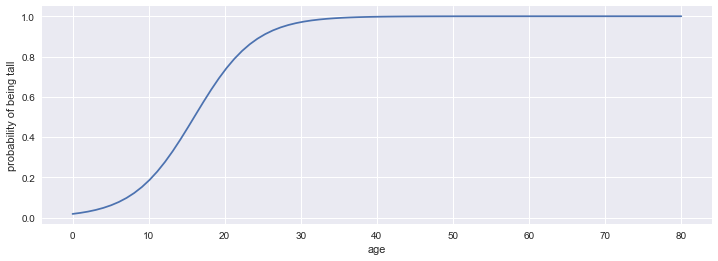

In [2]:
x = np.linspace(0, 80, 80)
y = -.25*(x - 16)
z = 1/(1 + math.e**y)
plt.figure(figsize=(12,4))
plt.xlabel('age')
plt.ylabel('probability of being tall')
plt.plot(x,z)
plt.show()

With this visualization we can get a sense of how different values for the parameter affect the model. The parameter $b$ determines the value at which the function returns a probability of .5, which is the point at which the slope of the curve stops increasing and begins to decrease. In this example, it means someone who is 16 years is just as likely to be tall as to be short. The parameter $a$ affects the slope of the curvy part of the function. In our example, a value of .25 results in a fairly gentle slope, which means the probability of being tall rises somewhat gradually as you get older. A higher value for $a$ would result in a much more severe slope. In our example that would fit a situation in which the probability you were tall remained quite low until you reach a certain age, say 16, after which the probability that you were tall would be quite high. 

In sum, logistic regression involves fitting a model to some data by determing which model parameters make it most likely that we would get that data. The model tells us how likely it is that some member of a given population has the target feature given they have some other attributes. Ultimately, logistic regression tells us something about the co-occurrence of attributes. If two attributes tend to co-occur, then something with one of the attributes is likely to have the other. We can be precise about how likely when the target feature is categorical by doing a logistic regression. Now that we have a rough idea of what logistic regression is, let's turn our attention to why we might want to use logistic regression.

### Why Do Logistic Regression

I want to consider three different reasons we might do logistic regression: to gain understanding, to make predictions, and to make something have the target feature (or not). 

The result of a logistic regression can help us understand whatever population we are analyzing. For example, we might just be interested in the people in our society and want to understand them better. Logistic regression could be used in pursuit of this goal. For a more practical example, perhaps as a business manager we want to understand the population that consists of our customers. Even if we do not have a particular business decision in mind, understanding the customers better can lead to new ideas and so may be worthwhile to pursue. Again, logistic regression could be useful here. We might try to understand how the amount spent at the business relates to some segment of the customer population.

The model that logistic regression analysis gives us can also be used to make predictions. We simply put some values of the independent attributes into the model and it will output a probability that a member of the population with those attributes has the target feature. Making predictions has obvious value for guiding all sorts of action. I will illustrate with an example. Suppose we are going to hold an event and we are wondering which venue to use, the big one or the small one. Which venue we should use will of course depend on whether many or few people will be attending the event. We can look at historical data for past events we have held and do a logistic regression to see what attributes of the past events are associated with many people attending the event. The resulting model can then be used to predict whether the upcoming event will require the use of the big venue or the small venue. Logistic regression can be used in this way as a guide to action. We want to know whether some member of a population we are going to encounter is likely to have the target feature or not so that we can plan accordingly. If we have the required data to do a logistic regression, then we can do one in order to make such a prediction. 

The last reason to do logistic regression that I want to talk about is using the resulting model to make something have the target feature (or not). This is in some sense using the model the opposite way as we did in prediction. Instead of putting in values for the attributes to get a prediction for whether the target feature will be present, we know we want the target feature to be present (or absent) and we can use the model to work backwards as to what attributes something needs to have in order to make that probable. Suppose for example we classify members of a sample of a population, say some sort of consumer product, as successes and failures. We can do a logistic regression to figure out what attributes make it highly probably that something in that population is a success. If we are making something that is going to be in this population, a new consumer product, that we want to be a success, then we can make sure it has the right attributes in order to make it likely to be a success. 

When using a logistic regression model as a guide to this sort of action, it is important to understand the limitations of what a logistic regression analysis gives us. Logistic regression does not tell us anything about the causal structure of the attributes being analyzed but, the causal structure is what we need to use if we are going to affect some change in the world. Now there is some relation between causal relationship and the sort of relationship logistic regression informs us about. Causal relationships are typically the reason we will find some correlation of attributes. So, if we want to explain why there is a correlation between some attributes, we will likely want to say something about the causal relationship between these attributes. For example, in the case of a hockey game there is an obvious causal relationship between number of goals scored and winning the game. You need to score more goals than the opponent to win, so scoring many goals is correlated with winning. Of course, the causal structure linking scoring goals and winning is more complicated than this. There are other factors that both cause an increase in goal scoring and make it more likely that a team will win, specifically how well the defense plays. A good defense can limit the time the opponent has the puck and the more time your team has the puck the more opportunities they will have to score. Also, the better the defense, the less goals the opponent scores and the less goals your team needs to score to win. These complex causal relations need to be accounted for when taking action that is intended to lead to winning more games.

Suppose we do a logistic regression just on the relationship between number of goals scored and whether the game was won. We will undoubtably find that scoring more goals makes one more likely to win. There is a direct causal relationship here. In particular, suppose we find that scoring six or more goals makes it almost certain that the game will be won. The team’s general manager and coach make changes to the team and strategy focused on getting to that six-goal threshold every game. They even go so far as to swap out the goalie for an extra offensive player. Even if they begin scoring six or more goals every game, the fact that they don’t have a goaltender leads them to be outscored. What has gone wrong is that the new strategy doesn’t take into account the more complex causal structure of the situation. It only looks at the causal relationship between scoring goals and winning. Now in this case, no one is likely to misunderstand the situation, but when it comes to things where we do not already have a good grasp of the causal situation, we need to both be careful not to infer a causal relationship just based on a logistic regression and even if we know there is a causal relation, not to assume that it alone account for the correlation observed between the attributes and the target feature. Furthermore, even if we do have a good idea of the causal structure of the attributes we are analyzing. If the system is dynamic, i.e. the relations between the attributes can change, then it is important to think about how any actions we perform will change the system and this isn't something a logistic regression analysis will tell us. 


### How To Do Logistic Regression

To explain how to do logistic regression I will simply demonstrate how with an example. Suppose we are moving to a new city, we will call it 'log city', and we are given some house listings that include attributes such as price, square footage, number of bedrooms, year built etc. But for whatever reason these listings do not include the address. Now suppose log city is split into two neighborhoods by a river, eastside and westside. It would be very helpful to have an idea of what houses are in which neighborhood and so we want to predict which neighborhood each house is in based on the information we have for it. 

In order to walk through the details of how we perform logistic regression, we will first just try to make a model that uses one attribute to predict whether the house is in eastside or westside. In this case we will use the year the house was built to predict which neighborhood it is. Now before we do anything, we can ask whether we should expect this attribute of a house to be predictive of the neighborhood it is in. We can be sure that it won't always be predictive, there is no reason that it is impossible for neighborhoods of a city to develop at around the same time at similar rates. If we looked for some examples where this is the case, they likely wouldn't be too hard to find. But it is also possible for neighborhoods, even ones right next to each other to develop at significantly different times (and rates as well). For example, a neighborhood might develop that is bordered by some swampy land that is much more difficult to develop. Nonetheless at some point in the future relative the development of that neighborhood, it may be worth the investment to develop that land into a new neighborhood. In this case the year the house was built would be predictive of what neighborhood the house is in. Now let’s suppose that the eastside neighborhood of log city was developed earlier that the westside neighborhood of log city. By performing a logistic regression, we should be able to infer that this is the case. Of course, we will be able to do even more than that by doing logistic regression. Logistic regressions will give us a precise way of predicting which neighborhood a house is in based on the year it was built. Specifically, we will be able to be precise about how likely it is in a particular neighborhood given the year it is built and the data we have. Even if we read that eastside was developed before westside on the Wikipedia page for log city, we wouldn't be able to make very precise predictions about which neighborhood a house was in based on the year it was built.  

In order to do logistic regression, we will need some data to fit the model to. The code below generates that data we need.

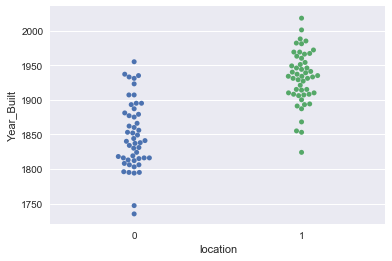

In [3]:
np.random.seed(1)

# Generate Some Example Data 
Eastside_Year_Built =  np.random.normal(loc=1850.0, scale=50.0, size=50)
Westside_Year_Built =  np.random.normal(loc=1925.0, scale=50.0, size=50)
Eastside_Year_Built = [min(round(i), 2018) for i in Eastside_Year_Built]
Westside_Year_Built = [min(round(i), 2018) for i in Westside_Year_Built]

# Create Data Frame
d_1 = {'location':[0]*50, 'Year_Built':Eastside_Year_Built}
d_2 = {'location':[1]*50, 'Year_Built':Westside_Year_Built}
df = pd.concat([pd.DataFrame(data=d_1), pd.DataFrame(data=d_2)], axis=0) 

# Plot Samples
sns.swarmplot(y='Year_Built', x='location', data=df)
plt.show()

Now we need to fit the model to the data. As mentioned above, fitting the model to the data involves figuring out which values for the parameters of the model make it most probable we would observe the collected data. Let $1, ..., n$ denote the observation that we have, let $y_i$ for $i \in \{1, ..., n\}$ be the value (1 or 0) that represents whether the $i$th observation has the target feature or not, and let $x_i$ for $i \in \{1, ..., n\}$ be the value of the independent attribute for the $i$th observation. Then $p(y_1, ..., y_n|a,b,x_1,...,x_n)$ is the probability that we observe the data we have given the parameters $a$ and $b$. If we treat $p(y_1, ..., y_n|a,b,x_1,...,x_n)$ as a function of $a$ and $b$, which can do because we have values for all the $y_i$ and $x_i$, then to fit the model to the data what we want to is find the maximum of this function. 

How are we to find the maximum? Well we start with an assumption that if true would make things much easier on us. The assumption is that the events $y_i$ and $y_j$ are independent, which implies $p(y_i, y_j|a,b,x) = p(y_i|a,b,x)p(y_j|a,b,x)$. We then have  

<br>
$$p(y_1, ..., y_n|a,b,x_1,...,x_n) = \prod_ip(y_i|a,b,x_i).$$

How does this help? Well if $y_i = 1$ then $p(y_i|a,b,x_i)$ is just logistic function with parameters $a$ and $b$ applied to $x_i$, $f(a,b,x_i)$, and importantly we know what that function is. If $y_i = 0$ then $p(y_i|a,b,x_i) = 1 - f(a,b,x_i)$ (just by the axioms of probability) and so again we know what that function is. We can represent $p(y_i|a,b,x_i)$ generically by $f(a,b,x_i)^{y_i} (1 - f(a,b,x_i))^{1 - y_i}$. If $y_i = 1$ then $f(a,b,x_i)^{y_i} (1 - f(a,b,x_i))^{1 - y_i} = f(a,b,x_i)^{y_i}$ and if $y_i = 0$ then $f(a,b,x_i)^{y_i} (1 - f(a,b,x_i))^{1 - y_i} = 1 - f(a,b,x_i)$ so it gives us what we want in either case. So, now we know how to state the function we are supposed to maximize, which we will call the likelihood function and it will be a function of our parameters $a$ and $b$: 

<br>
$$L(a,b) = \prod_i f(a,b,x_i)^{y_i} (1 - f(a,b,x_i))^{1 - y_i} = \prod_i  \frac{1}{1+ e^{-a(x - b)}}^{y_i}\left(1 - \frac{1}{1+ e^{-a(x - b)}}\right)^{1- y_i}.$$

Is this assumption that $y_i$ and $y_j$ are independent warranted in our example? Arguably $y_i$ and $y_j$ aren't necessarily going to be independent in our case. Imagine we go back to when log city was just starting to develop. Whether you build a new house in the eastside or the westside neighborhood may very well be influenced by what other construction is going on in log city. But it isn't as if the events $y_i$ and $y_j$ are totally dependent on each other either. So, we should go ahead with the logistic regression but just keep in mind that the assumption isn't 100% accurate for our scenario. 

Now we need to find the values for $a$ and $b$. To do so we will need to do some calculus. We could try to take the derivate of our function and find the point at which the derivate is equal to zero. This would correspond to the maximum. But unfortunately, we won't be able to solve for the values of $a$ and $b$ for which the derivate is equal to zero. So, we will use a method for estimating the maximum called gradient descent.

### Gradient Descent

The name 'gradient descent' suggests we will be going downward. Indeed, rather than maximizing the likelihood function for our logistic regression we will instead minimize the negative of our likelihood function, $-L(a,b)$, which is essentially the same thing. Gradient descent works by making successively closer guesses as to what the minimum is. We start by randomly choosing a point $(a_1, b_1)$ and we find the slope, a.k.a. gradient, of our function at that point. Obviously, if $(a, b)$ happens to be the minimum, in which case the gradient will be zero, then we can stop. Assuming it isn't we want to next choose $(a_2, b_2)$ such that $f(a_1, b_1, x) > f(a_2, b_2, x)$. To do this we check the gradient and adjust $a_1$ and $b_1$ in whatever direction the gradient indicates is downward (note that since we have two inputs into our function increasing $a$ and decreasing $b$ or vice versa may take us downward). How much we adjust our guess from one to the next is often called 'the learning rate' ($\eta$) and it is up to us to decide what it is. We won't know in advance what the best learning rate will be for our problem, so one option would be to try out several. But, this topic of how to pick a learning rate is beyond what I want to discuss here. Anyway, for each stage in gradient descent we have:

$$a_{i+1} = a_i + \frac{\eta}{n} \frac{\partial L(a_i,b)}{\partial a_i}$$

$$b_{i+1} = b_i + \frac{\eta}{n} \frac{\partial L(a,b_i)}{\partial b_i}$$

where $\frac{\partial L(a_i,b)}{\partial a_i}$ is the gradient with respect to $a$ and $n$ is the number of observations. As we will see the gradient consists of a sum where the number of summands depends on the number of observations, so we adjust the gradient accordingly so that it isn't dependent on sample size. 

To use these equations to do gradient descent we need to calculate the formula for the gradient of our likelihood function. To do this we need to find the partial derivates (one for $a$ and one for $b$) of our likelihood function. To make the math easier we can work with the logarithm of our likelihood function as they will have the same maximum (recall we are actually going to minimize the negative of our likelihood function but the negative of the logarithm of our likelihood will have the same minimum). Note that the logarithm of the likelihood is often called 'the log-likelihood' and this name has nothing to do with the fact that we are doing logistic regression. Anyway, we will apply the logarithm function to our likelihood function and then to simplify we will do some algebra. The relevant rules for the logarithm function are: $\log(xy) = \log(x) + \log(y)$ and $\log(x^y) = y\log(x)$. 

$$\log(L(a,b)) = \log\left(\prod_i  f(a,b,x_i)^{y_i}\left(1 - f(a,b,x_i)\right)^{1- y_i}\right) =$$

$$\sum_i \log\left(f(a,b,x_i)\left(1 - f(a,b,x_i)\right)^{1- y_i}\right)=$$

$$\sum_i \log\left(f(a,b,x_i)^{y_i}\right) + \log\left(\left(1 - f(a,b,x_i)\right)^{1- y_i}\right)=$$

$$\sum_i y_i\log\left(f(a,b,x_i)\right) + (1 - y_i)\log\left(1 - f(a,b,x_i)\right).$$

Now we need to take the partial derivative with respect to $a$ and then with respect to $b$. Fortunately, we won't have to use the definition of the derivative to figure what it is because we can just rely on some common rules for derivatives and a couple of facts. The relevant facts are that $1 - f(a,b,x) = f(-a, b, x)$ and that $f(a,b,x_i)\left(e^{-a(x - b)}\right) = f(-a, b, x)$ . The relevant rules are: $\frac{d}{dx}(f(x)+g(x))=\frac{d}{dx}f(x)+\frac{d}{dx}g(x)$, $\frac{d}{dx}cf(x) = c\frac{d}{dx}f(x)$, $\frac{d}{dx}f(g(x)) = \frac{df(x)}{dx}(g(x))(\frac{d}{dx}g(x))$, and $\frac{d}{dx}\log(x) = \frac{1}{x}$. First, I'll compute the partial derivative of the log-likelihood with respect to $a$. 

$$\frac{\partial \log(L(a,b))}{\partial a} = \sum_i\frac{\partial}{\partial a}  y_i\log\left(f(a,b,x_i)\right) + \frac{\partial}{\partial a}(1 - y_i)\log\left(1 - f(a,b,x_i)\right)$$

$$= \sum_i\frac{\partial}{\partial a}  y_i\log\left(f(a,b,x_i)\right) + \frac{\partial}{\partial a}(1 - y_i)\log\left(f(-a,b,x_i)\right)$$

$$= \sum_i y_i\frac{\partial}{\partial a}  \log\left(f(a,b,x_i)\right) + (1 - y_i)\frac{\partial}{\partial a}\log\left(f(-a,b,x_i)\right)$$

$$= \sum_i \left(\frac{y_i}{f(a,b,x_i)}\right)\left( \frac{\partial}{\partial a}\left(f(a,b,x_i)\right)\right) + \left(\frac{(1 - y_i)}{f(-a,b,x_i)}\right) \left(\frac{\partial}{\partial a}\left(f(-a,b,x_i)\right)\right)$$

$$= \sum_i \left(\frac{y_i}{f(a,b,x_i)}f(a,b,x_i)^2\frac{\partial}{\partial a}\left(e^{-a(x_i - b)}\right)\right) + \left(\frac{(1 - y_i)}{(f(-a,b,x_i)}f(-a,b,x_i)^2\frac{\partial}{\partial a}\left(e^{a(x_i - b)}\right)\right)$$

$$= \sum_i \left(y_i f(a,b,x_i)\left(e^{-a(x_i - b)}\right)(-(x_i-b))\right) + \left((1 - y_i)f(-a,b,x_i)\left(e^{-a(x_i - b)}\right)(x_i - b)\right)$$

$$= \sum_i y_i f(-a,b,x_i)(-(x_i-b)) + (1 - y_i)f(a,b,x_i)(x_i - b)$$

$$= \sum_i y_i (1 - f(a,b,x_i))(-(x_i-b)) + (1 - y_i)f(a,b,x_i)(x_i - b)$$

$$= \sum_i y_i(-(x_i-b)) - y_if(a,b,x_i)(-(x_i-b)) + f(a,b,x_i)(x_i - b) - y_i f(a,b,x_i)(x_i - b)$$

$$= \sum_i  y_i(-(x_i-b)) + f(a,b,x_i)(x_i - b) $$

$$= \sum_i  -(x_i-b)(y_i - f(a,b,x_i)).$$

So, we end up with something that is pretty simple. If we did the same thing with respect to $b$ we get:

$$\frac{\partial \log(L(a,b))}{\partial b} = \sum_i  a(y_i - f(a,b,x_i)).$$

Now we can plug these formulas into our algorithm for gradient descent and apply it to our model and data (just keep in mind that we will use the negative of these equations in order to make it a descent). Before we do that there is one more crucial step, we must transform our data so that it is on a much smaller scale. The reason we need to do this is that the parameter $b$ is going to be the year a house would need to be built in for the model to assign it even odds that it is in westside. Just looking at the data above we can estimate that $b$ will be somewhere in the high 1800s or low 1900s. In contrast, our parameter $a$ is going to be much much closer to zero relative to $b$. The fact that they will be so far apart is going to make it difficult for our gradient descent to approach a minimum. Fortunately, transforming the data is not difficult, I will do so using the mean and standard deviation of the data.   

In [4]:
# Standardize Data
data = np.array(Eastside_Year_Built + Westside_Year_Built)
mean = data.mean()
std = data.std()

data = (data-mean)/std

Now we are ready to apply gradient descent. The following code will perform 1000 iterations of updating the parameters using the equations above. 

In [5]:
a = np.random.random(1)[0]
b = np.random.random(1)[0]
observations = [(i,0) for i in data[:50]]
observations.extend([(i,1) for i in data[50:]]) 
rate = .1
descent = []
for i in range(1000):
    gradient_a = -sum([-(i[0] - b)*(i[1]-(1/(1 + math.e**(-a*(i[0] - b))))) for i in observations])
    gradient_b = -sum([a*(i[1]-(1/(1 + math.e**(-a*(i[0] - b))))) for i in observations])
    a = a + (rate/100)*gradient_a
    b = b + (rate/100)*gradient_b
    descent.append((a,b))

Let's see what values we got by doing gradient descent for our model parameters.  

In [6]:
descent[-1]

(2.3645869422824926, 0.05397484445157824)

We can see that it is difficult to interpret what the model will be like just based on these values. We will visualize the model below, which will give us a good idea of what it is like. But we can also reverse the transformation we applied to the data for the value for our parameter $b$.

In [7]:
descent[-1][1]*std + mean

1893.6380137139865

Recall that this value is the year a house would need to be built in for the model to assign even odds that it is in westside. So, we get some idea of what the model will be like just by looking at this parameter. To see how the value $a$ affects the model it is easiest to visualize it.  

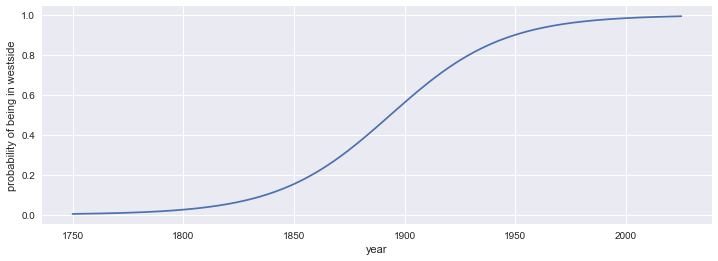

In [8]:
x = np.linspace(1750, 2025, 275)
y = -descent[-1][0]*(((x-mean)/std) - descent[-1][1])
z = 1/(1 + math.e**y)
plt.figure(figsize=(12,4))
plt.xlabel('year')
plt.ylabel('probability of being in westside')
plt.plot(x,z)
plt.show()

From this graph we can see that our model has a fairly gentle slope. You may recall from above that higher values for $a$ would result in a more severe slope. So, in the context of our problem our $a$ value is relatively low. The last thing I want to do is to visualize how our gradient descent algorithm performed. This is a good thing to check to make sure it was done correctly. We can see how it went by visualizing the value for the function we were trying to minimize, i.e. the negative of the log-likelihood, over the many iterations we did for updating the parameter values. The code below calculates the negative of the log-likelihood for each iteration and then makes a visualization of it.  

In [9]:
loss = []
for i in descent:
    y = -sum([(j[1]*math.log(1/(1 + math.e**(-i[0]*(j[0] - i[1])))) + (1- j[1])*math.log(1 - (1/(1 + math.e**(-i[0]*(j[0] - i[1])))))) for j in observations])
    loss.append(y)

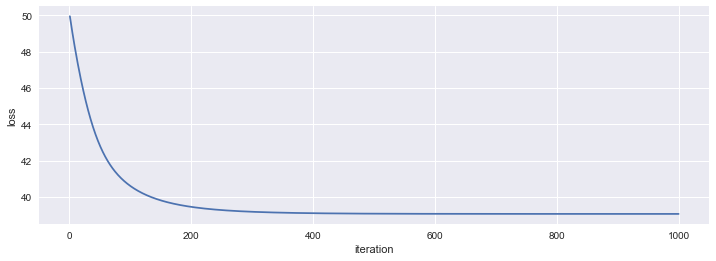

In [10]:
x = list(range(1,1001))
y = loss

plt.figure(figsize=(12,4))
plt.xlabel('iteration')
plt.ylabel('loss')
plt.plot(x,y)
plt.show()

We can see that the descent went smoothly. Another way we can be sure that it worked well is to choose other random starting points and make sure that we got the same results. If you run the code above multiple times you should see the same results. 

We have successfully fit the model to our data and have thus completed a logistic regression analysis of the relationship between when a house was built in log city and what neighborhood it is in. In the context of our original problem, we could use this model to predict which neighborhood the houses are in that we were given the listings for. Will the predictions be any good? Given that I made up the data this isn't something we are in a position to evaluate. It certainly does reflect the story I told behind the data I generated. If we were using the model for predictions in the real world, we could assess the predictions it made to see how it performs and we could improve the model by incorporating the new data we got. So, while
we have now covered the basics of the what, why, and how of logistic regression, there is plenty more to understand about logistic regression. The most obvious topics to investigate from this point are how to evaluate logistic regression models. For example, we should be concerned about whether our data is representative of the population. Even if it is representative, we should be concerned about how noisy the data is and whether our model might be overfitting to the data, i.e. incorporating the noise into the model. There are techniques to avoid overfitting, such as regularization that are worth researching. Lastly, the example we looked at only created a model with one independent attribute, so it is worth looking it how to handle logistic regression when we have data for multiple independent attributes that we want to use in our model. Fortunately, the math is similar to what we saw here, even though it is more complex.  